# Conv2D Model
## Alec & Brendon Barrios   |   08/17/2020

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


#access saved data file
IMG_SIZE = 70
LOAD_FILE = "{}data-{}x{}.npy".format("small-train", IMG_SIZE, IMG_SIZE)

load_data = np.load(LOAD_FILE, allow_pickle=True)

#parse data for neural net input
X_train = []
for i in range(len(load_data)):     # cannot be inline to preserve ndarray type
    X_train.append(load_data[i][0])

Y_train = []
for i in range(len(load_data)):
    Y_train.append(load_data[i][1])

Intercepts = []
for i in range(len(load_data)):
    Intercepts.append(load_data[i][2])

In [38]:
from tensorflow import keras as K
from tensorflow.keras import layers

#img input
img_input = K.Input(shape=(IMG_SIZE,IMG_SIZE,1))

#input layer
conv2D = layers.Conv2D(20, 4, activation='relu')
x = conv2D(img_input)

#hidden layers
x = layers.Conv2D(40, 4, activation='relu')(x)
# MaxPooling
x = layers.Conv2D(80, 4, activation='relu')(x)
# MaxPooling
x = layers.Flatten()(x)

#output layer
output_layer = layers.Dense(1)(x)

#compile model (optimizers, loss, metrics)
model = K.Model(inputs=img_input, outputs=output_layer, name="OSIC_PF_model")
model.summary()

model.compile(
    loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=K.optimizers.RMSprop(),
    metrics=["accuracy"])


Model: "OSIC_PF_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 70, 70, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 67, 67, 20)        340       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 40)        12840     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 80)        51280     
_________________________________________________________________
flatten_2 (Flatten)          (None, 297680)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 297681    
Total params: 362,141
Trainable params: 362,141
Non-trainable params: 0
_______________________________________________

In [39]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=3)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'numpy.float64'>"})

In [36]:
type(X_train)

list

In [37]:
type(X_train[0])

numpy.ndarray

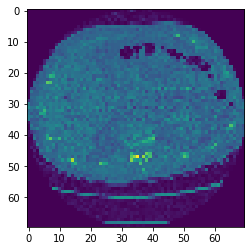

In [32]:
plt.imshow(X_train[0])

In [ ]:
img_tensor = X_train[0]

In [ ]:
#fit model

#post-processing: convert activation to -slope

#post-p: use -slope to predict FVC at x week

#get money